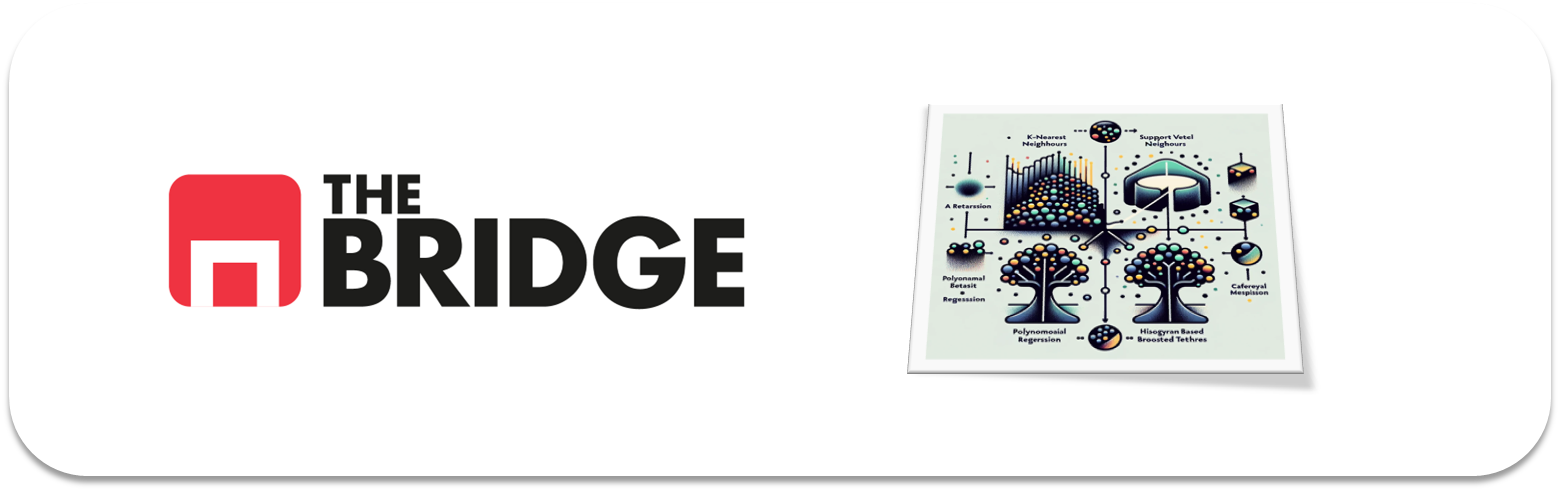

* La práctica consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [33]:
import pandas as pd
import numpy as np
import scipy
import sklearn
from sklearn.metrics import *


In [34]:
# Libreías gráficas
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import plotly.express as px

In [35]:
# Funciones
import os
import sys
utils_path = r'C:\Users\0205301\OneDrive - SENER\Documentos\GitHub\EDAMOTO\src\utils'
sys.path.append(utils_path)
from utils import *

In [36]:
#switch off the warnings
import warnings
warnings.filterwarnings('ignore')

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

NOTA: El dataset está limpio y sin valores faltantes.

In [37]:
# carga de datos
df=pd.read_csv('./datasets/wines_dataset.csv',sep="|")

# 1 Análisis EDA

In [38]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [39]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
6492,7.7,0.39,0.34,10.0,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,5,white
6493,8.2,0.73,0.21,1.7,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,red
6494,7.4,0.31,0.48,14.2,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,white
6495,8.3,0.65,0.10,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,red
6496,8.4,0.67,0.19,2.2,0.093,11.0,75.0,0.99736,3.20,0.59,9.2,4,red


In [40]:
df.shape

(6497, 13)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [42]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class                   0
dtype: int64

In [43]:
print("Calidad del vino",df['quality'].unique())

Calidad del vino [6 7 3 5 4 8 9]


## Análisis univariante

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    
    # Histogram plot
    plt.subplot(1, 3, 1)
    feature.plot(kind='hist', bins=20, alpha=0.7)
    plt.title(f'{feature.name} histogram plot')
    
    # Density plot
    plt.subplot(1, 3, 2)
    sns.histplot(feature, kde=True, color='blue')
    plt.title(f'{feature.name} distribution plot')
    
    # Box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=feature)
    plt.title(f'{feature.name} box plot')
    
    plt.tight_layout()
    plt.show()



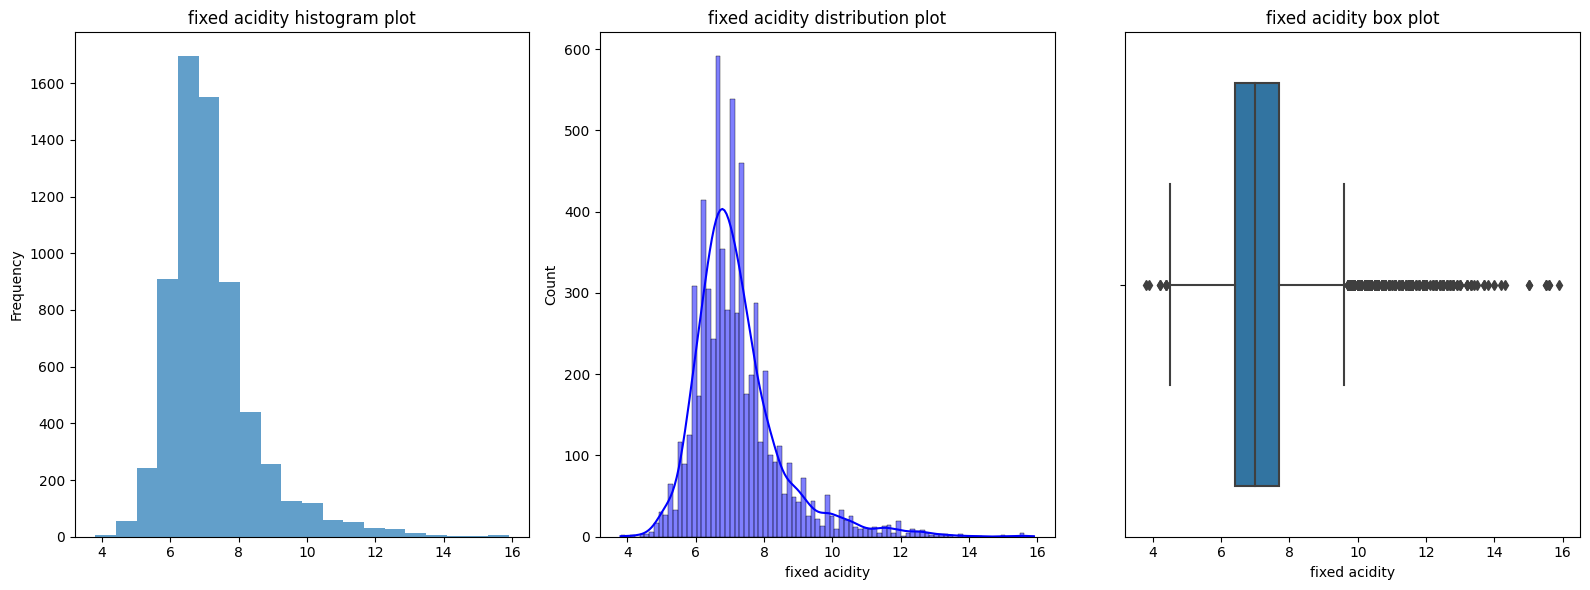

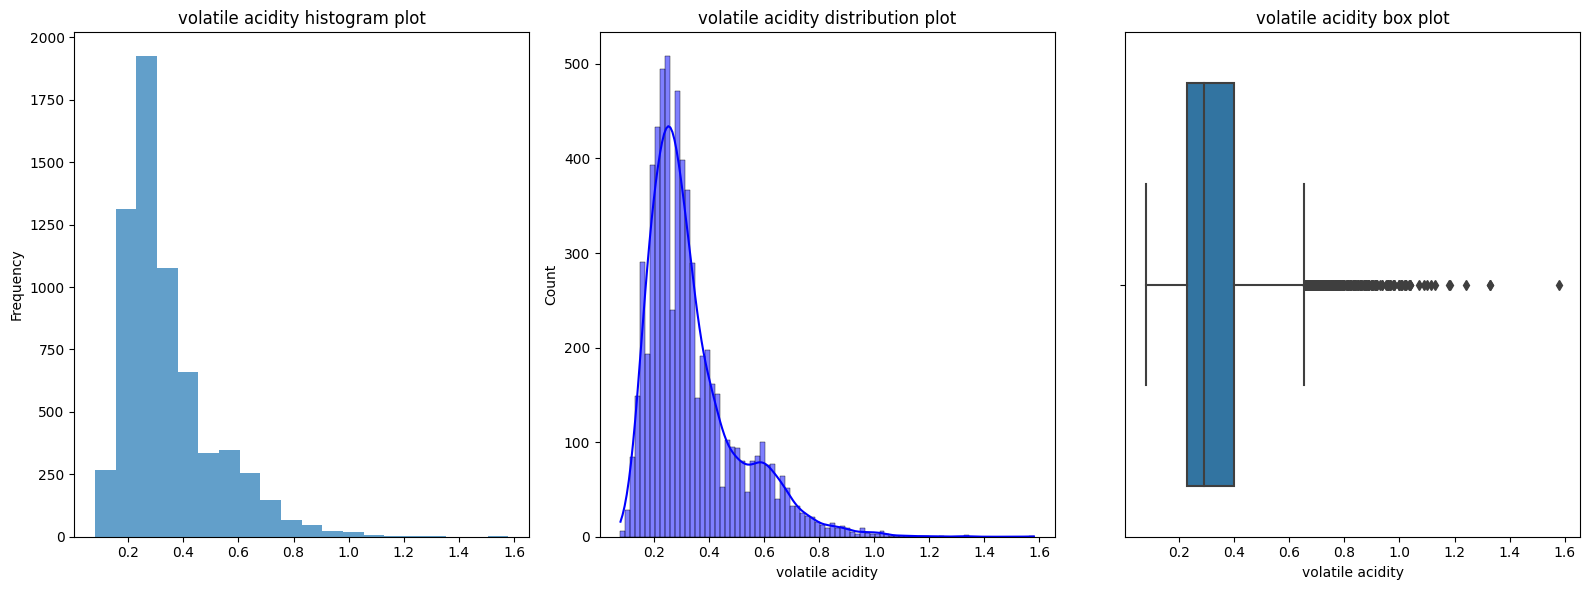

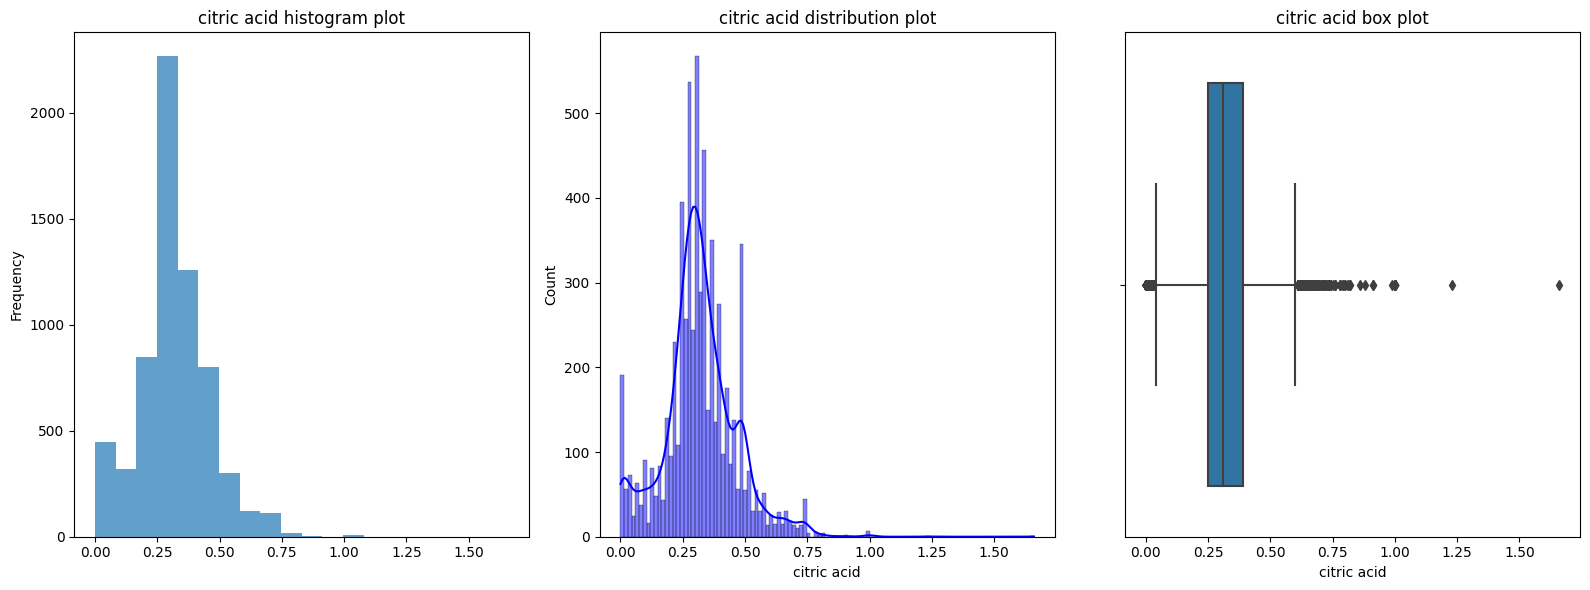

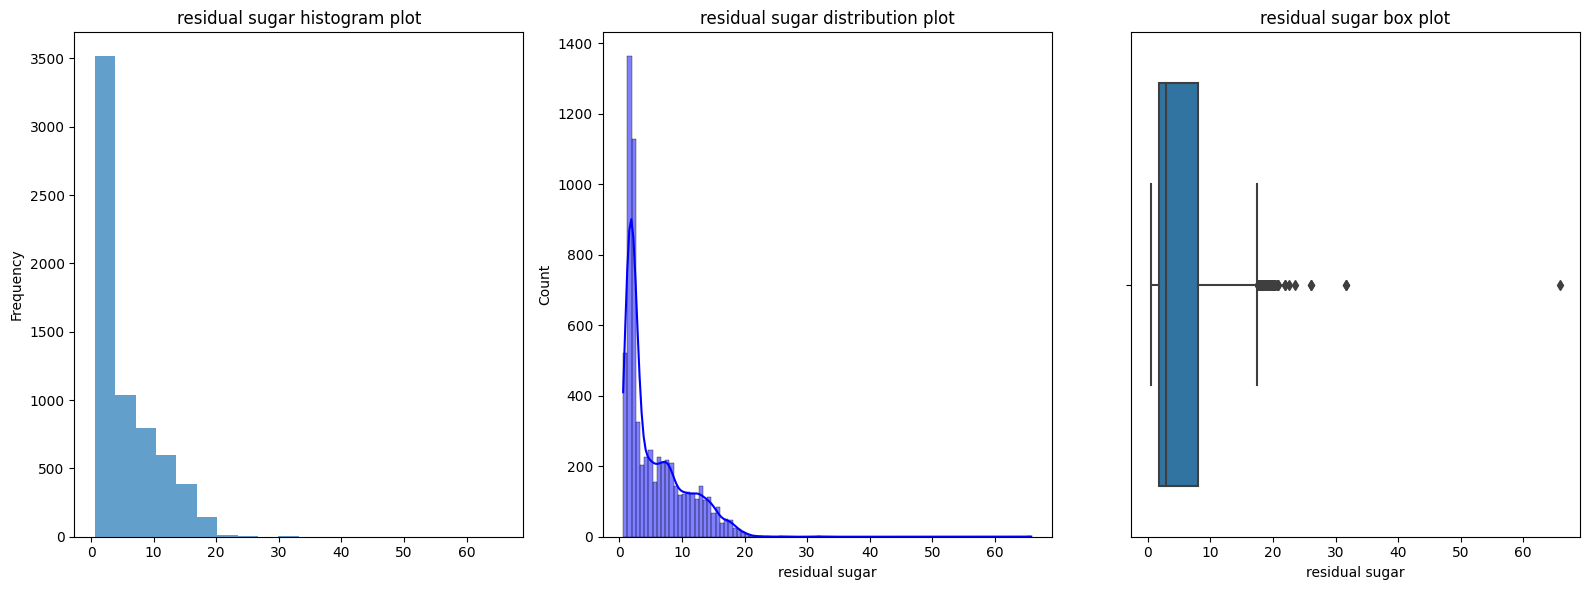

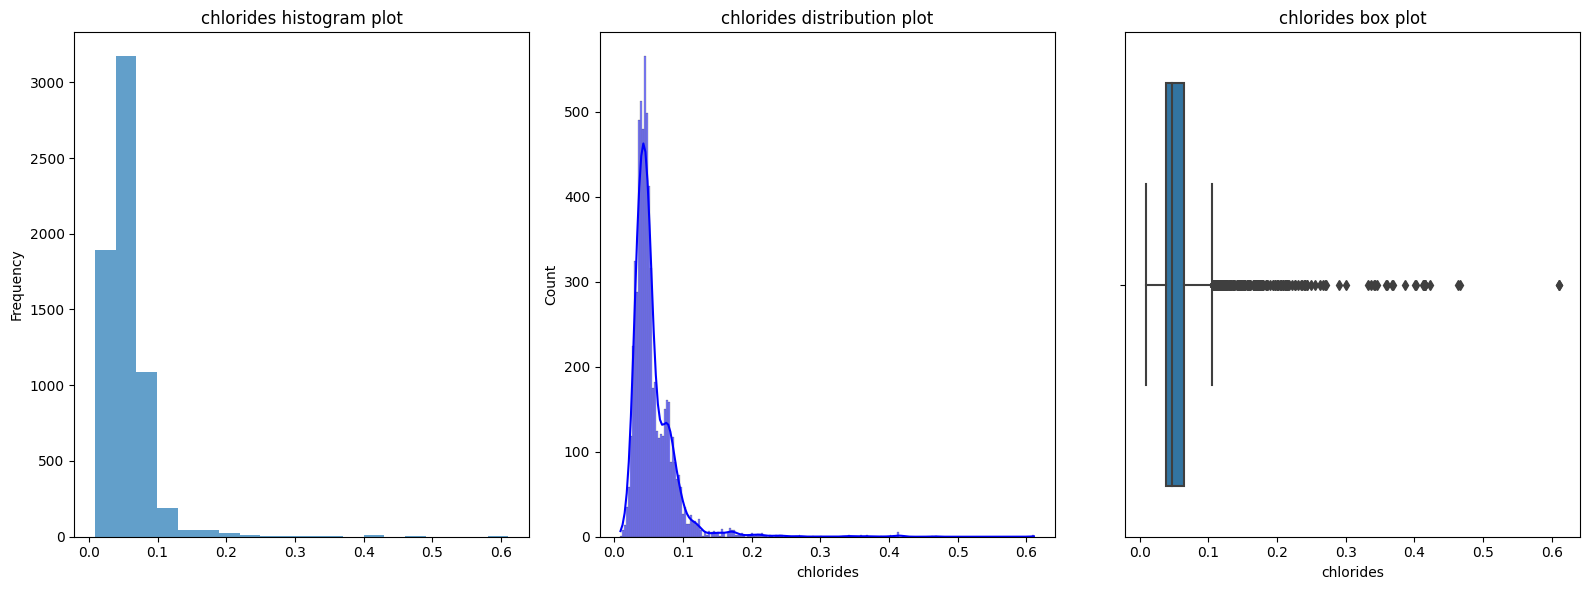

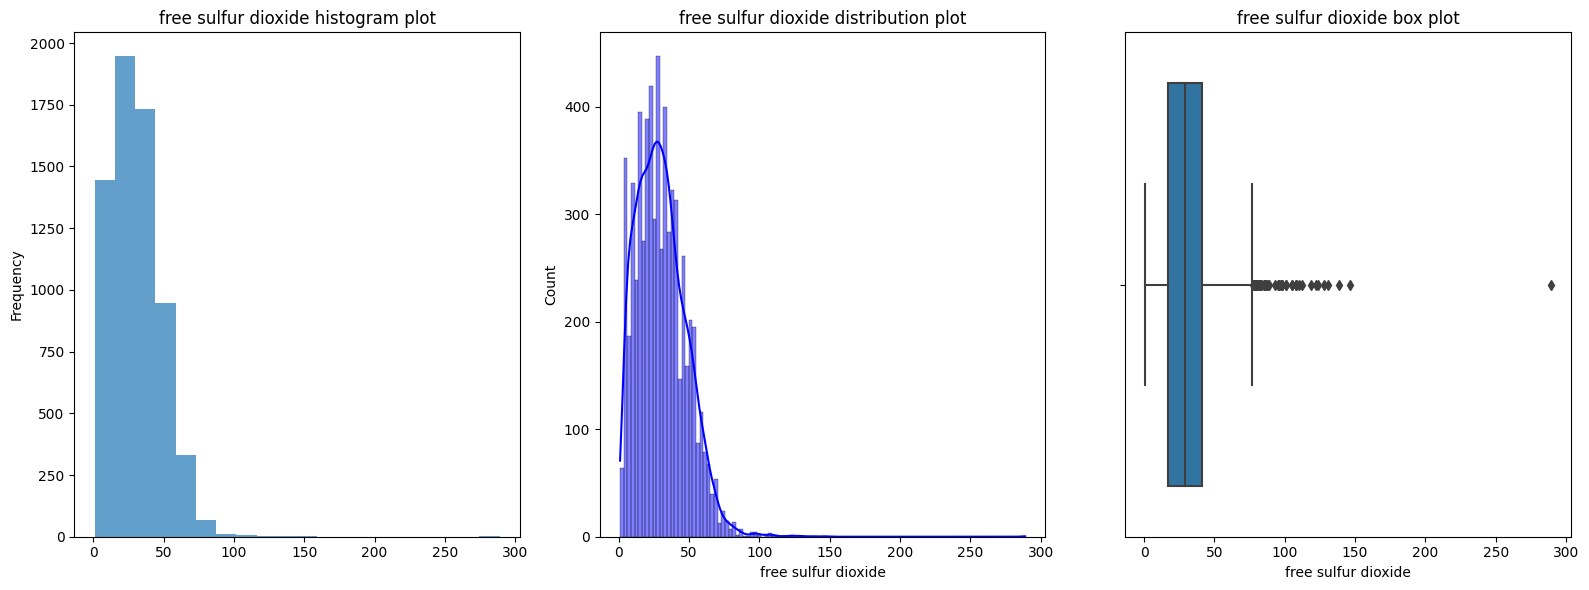

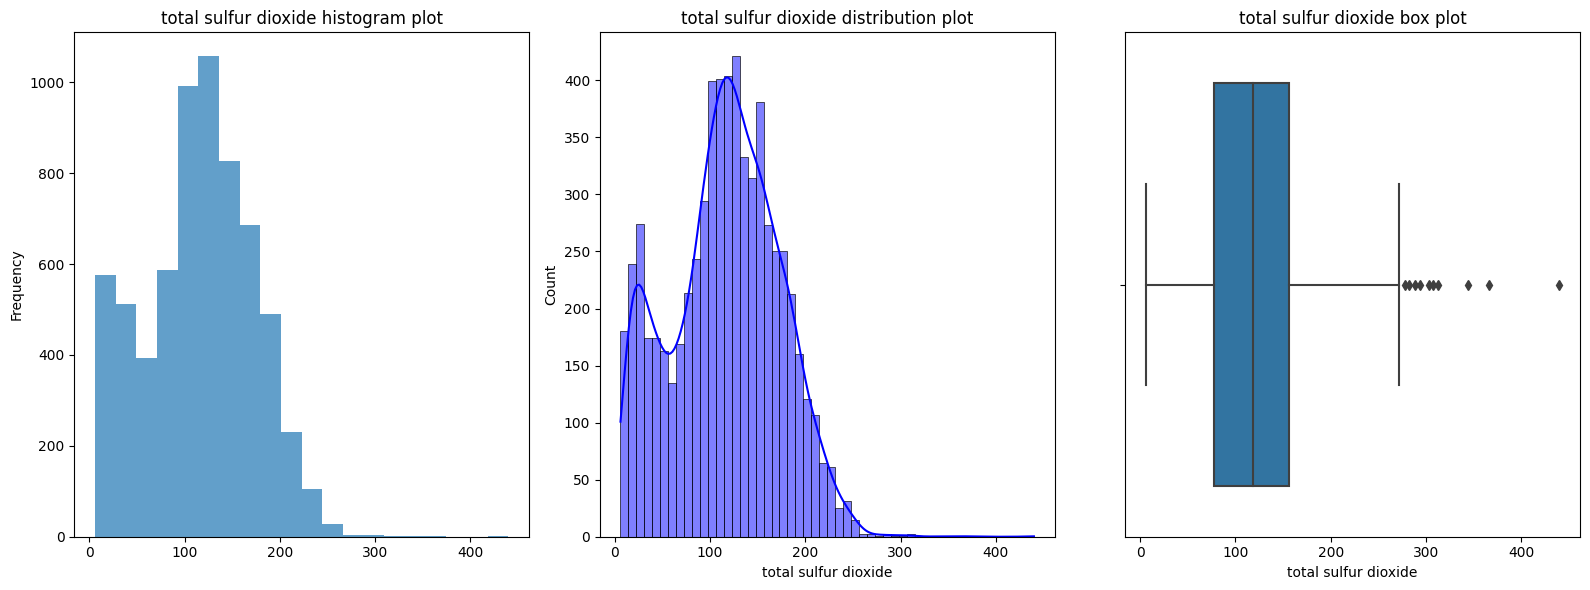

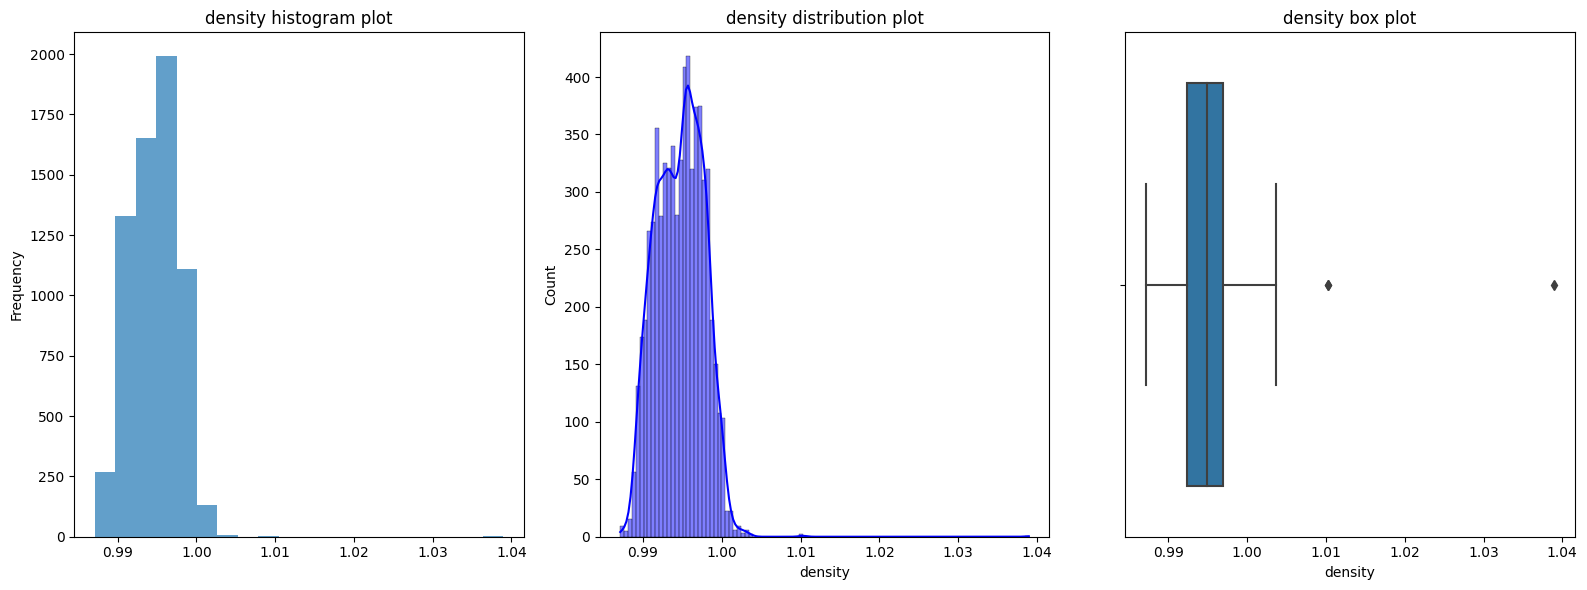

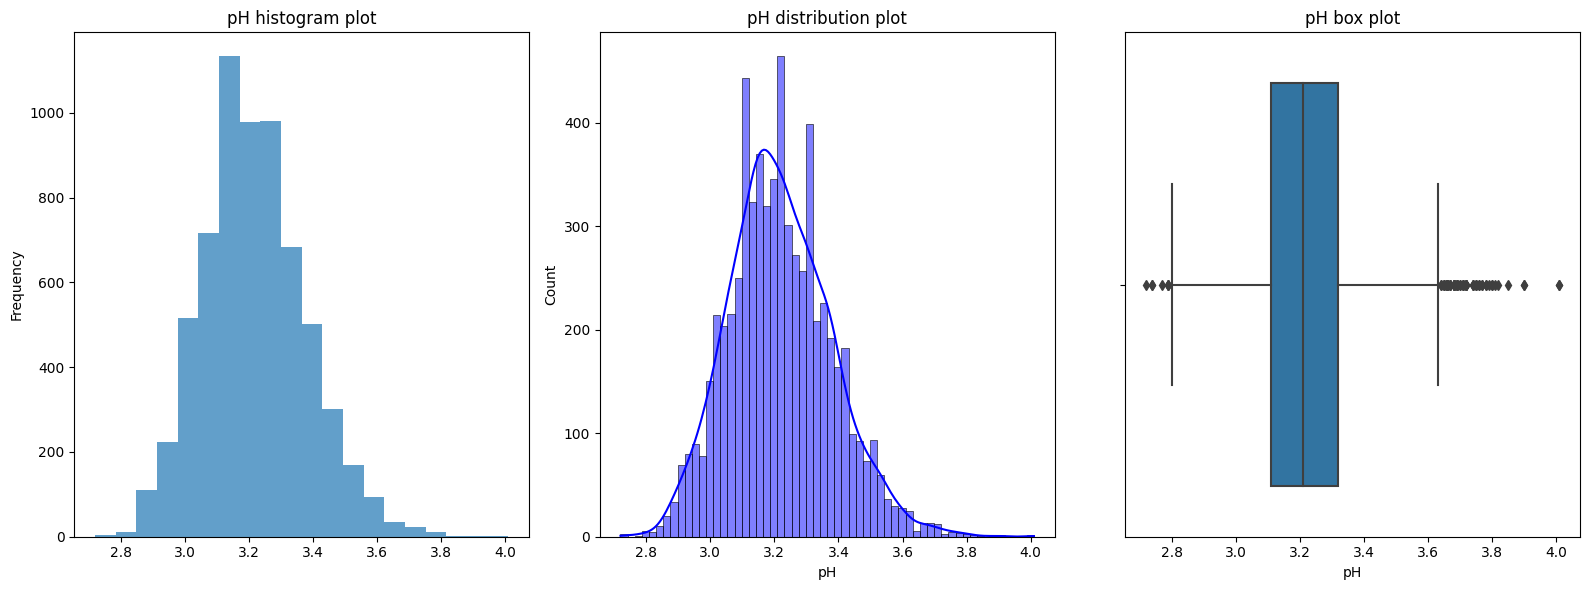

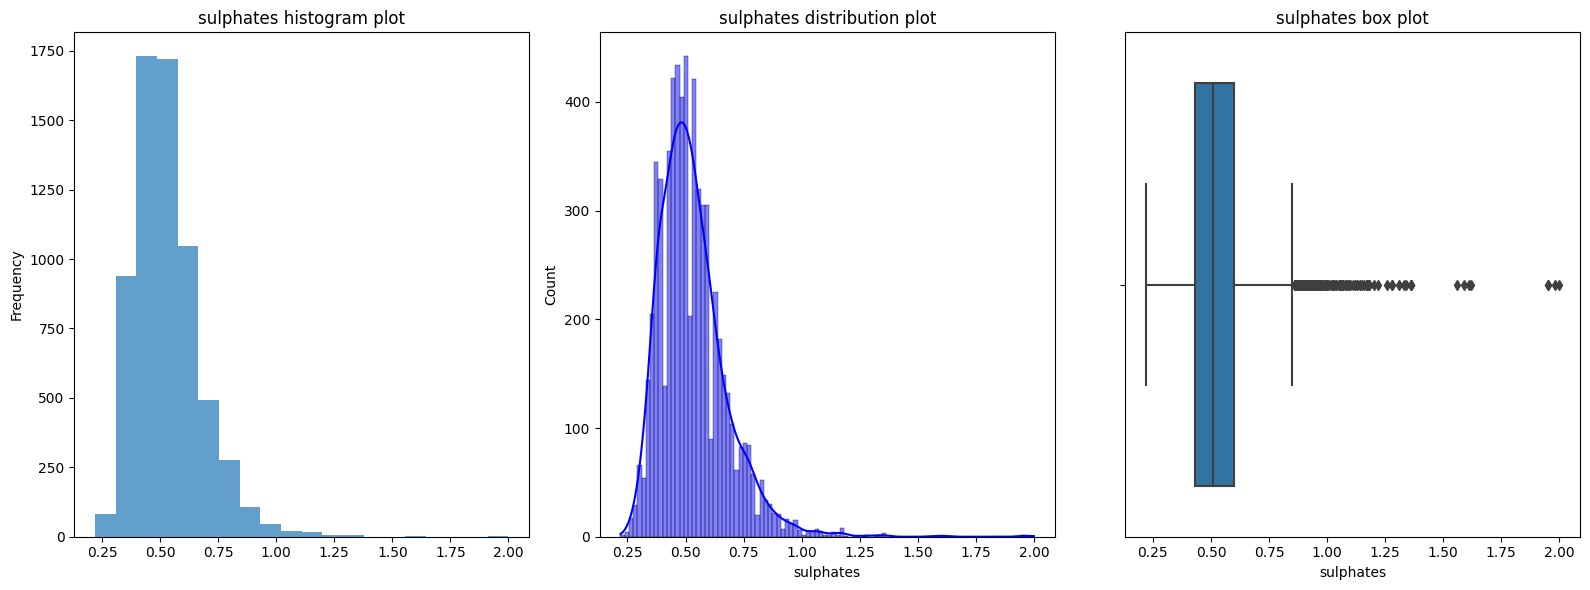

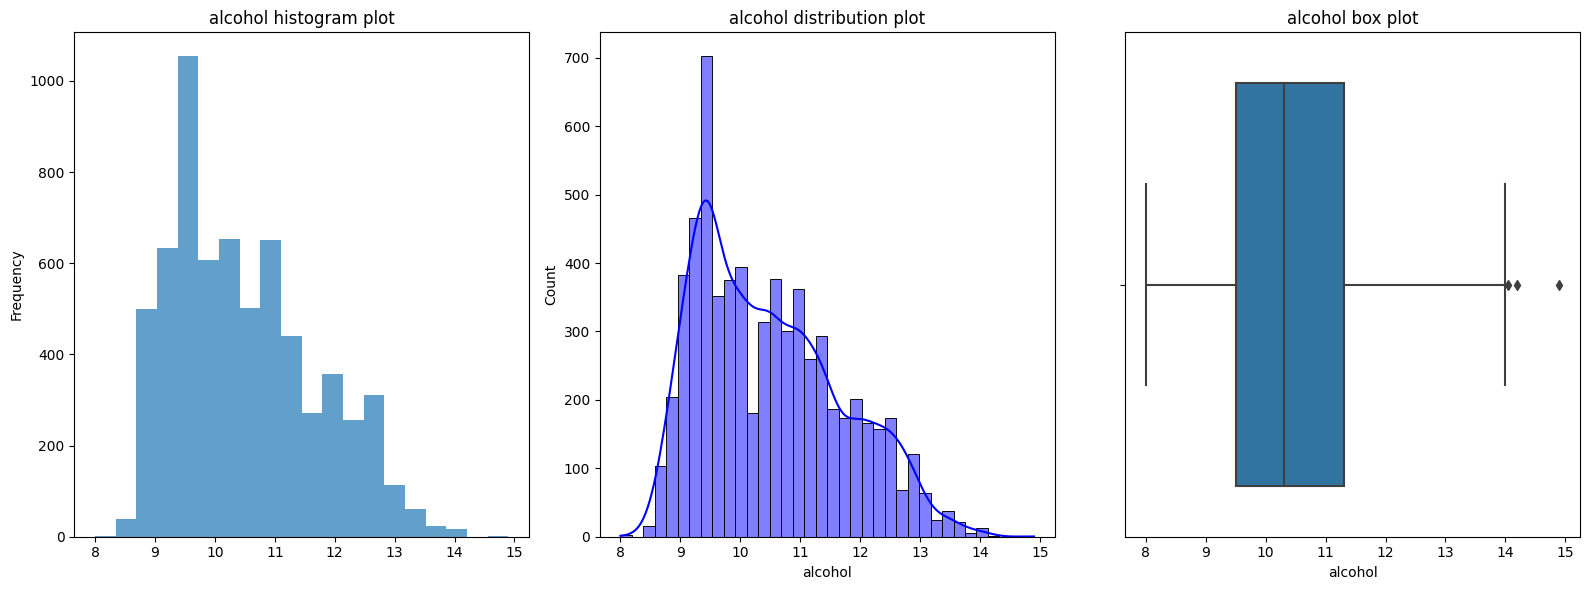

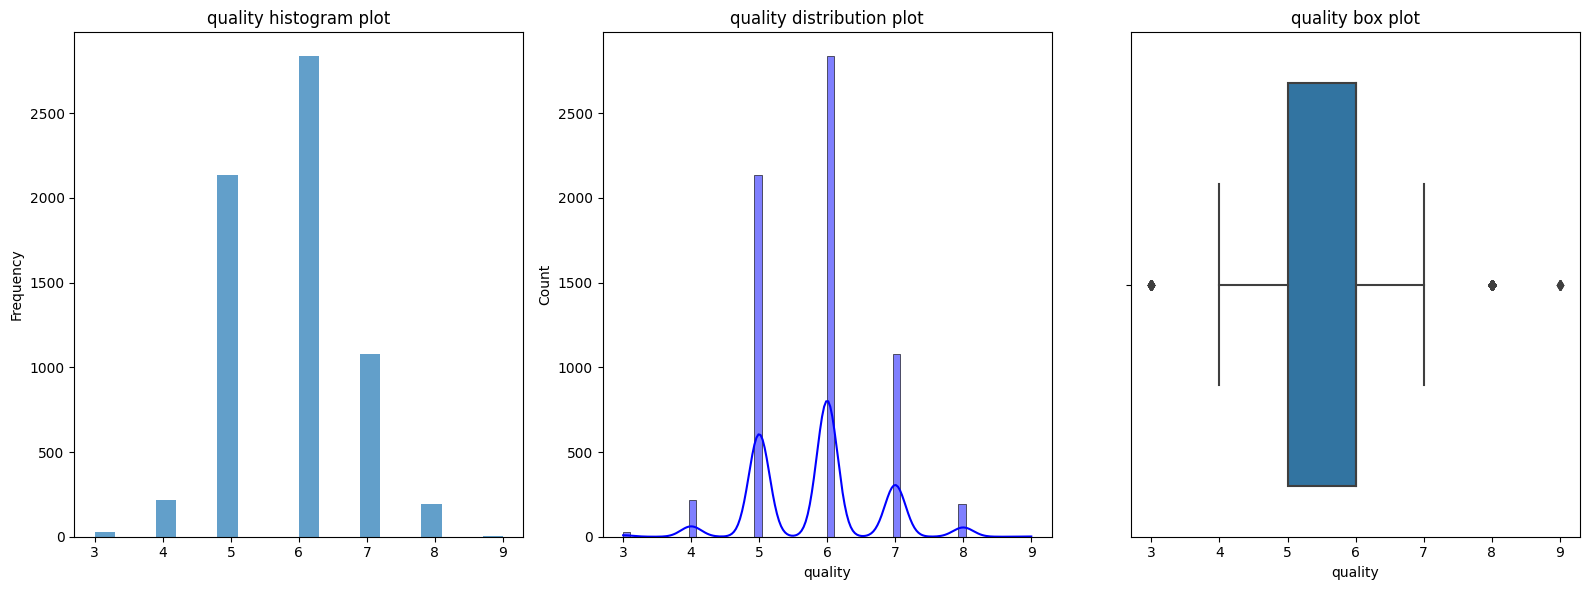

In [45]:
num_cols = df.select_dtypes(include = 'number').columns
for col in num_cols:
    feat_plot(df[col])

## Análisis Bivariante

In [50]:
# Binarizamos class white y Red por 0 y 1
df['class']=df['class'].apply(lambda x: 1 if x == 'white' else 0)
df['Categoria'] = df['quality'].apply(lambda x: 1 if x >= 5 else 0)
float64_columns = df.select_dtypes(include=['float64']).columns
df[float64_columns] = df[float64_columns].astype('float32')

In [51]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class,Categoria
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,0,1
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,0,1
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,0,1
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,0,0
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,0,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float32
 1   volatile acidity      6497 non-null   float32
 2   citric acid           6497 non-null   float32
 3   residual sugar        6497 non-null   float32
 4   chlorides             6497 non-null   float32
 5   free sulfur dioxide   6497 non-null   float32
 6   total sulfur dioxide  6497 non-null   float32
 7   density               6497 non-null   float32
 8   pH                    6497 non-null   float32
 9   sulphates             6497 non-null   float32
 10  alcohol               6497 non-null   float32
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   int64  
 13  Categoria             6497 non-null   int64  
dtypes: float32(11), int64(3)
memory usage: 431.6 KB


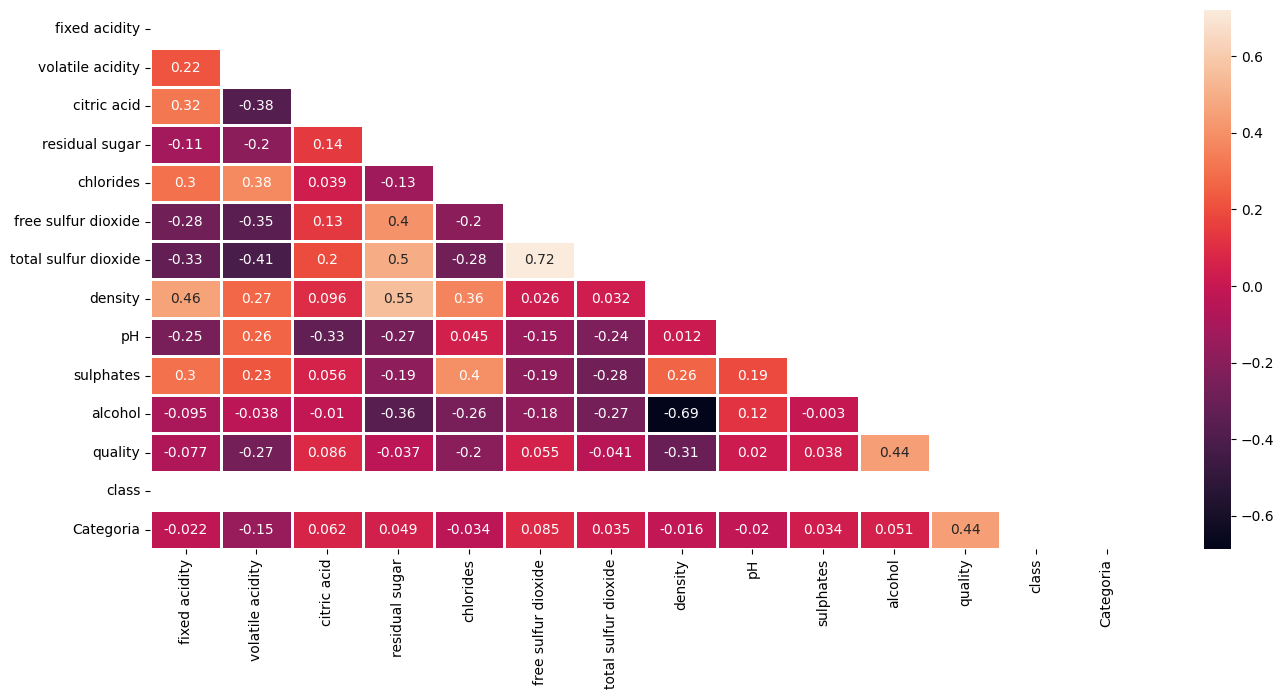

In [54]:
# heatmaps for class and Categoria
from enum import unique


plt.figure(figsize = (16, 7))

for class, cat in zip(df.class.unique(),df.Categoria.unique()).item:
    dff=qfilter()
    

c

In [ ]:
# pairs of scatterplots and distributions
sns.set_theme(style='white')
sns.pairplot(df.drop(columns=['quality']),kind="reg",diag_kind='kde',plot_kws={'line_kws':{'color':'red'}},corner=True)
plt.tight_layout()
plt.show()

In [ ]:
target=df[['quality']].value_counts(normalize=True).sort_index().round(decimals=3)*100
fig=go.Figure()
fig.add_trace(go.Pie(labels=target.index, values=target, hole=.5, 
                     showlegend=True,sort=False, 
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "%{label} Transported: %{value:.2f}%<extra></extra>"))
fig.update_layout( title='Calidad del vino')
fig.show()

# Proceso: Transformación - Escalado - Outliners - Desbalanceado

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.stats import shapiro

# Funciones para la transformación de las características numéricas
def sqrt_transform(X):
    return np.sqrt(X)

def log_transform(X):
    return np.log1p(X)
def classify_distributions(df, threshold=0.05):
    """
    Clasifica las distribuciones de las columnas numéricas del DataFrame en una de las siguientes categorías:
    - 'normal': si la distribución se ajusta a una distribución normal según el test de Shapiro-Wilk.
    - 'positive_increasing': si la distribución es estrictamente creciente positiva.
    - 'positive_decreasing': si la distribución es estrictamente decreciente positiva.
    - 'rectangular': si la distribución es rectangular.
    - 'skewed_left': si la distribución tiene sesgo a la izquierda.
    - 'skewed_right': si la distribución tiene sesgo a la derecha.
    - 'bimodal': si la distribución tiene dos modas.
    - 'trimodal': si la distribución tiene tres modas.
    - 'polimodal': si la distribución tiene más de tres modas.
    - 'other': si no encaja en ninguna de las categorías anteriores.
    
    Parameters:
    - df: DataFrame. El DataFrame que contiene las características.
    - threshold: float. Umbral para clasificar la distribución como normal según el test de Shapiro-Wilk.

    Returns:
    - dist_class: dict. Un diccionario que mapea el nombre de cada columna con una tupla que contiene
                  el tipo de distribución y el nombre de la transformación propuesta.
    """
    # Seleccionar solo las columnas numéricas
    numeric_cols = df.select_dtypes(include=['number']).columns

    dist_class = {}

    for col in numeric_cols:
        data = df[col].dropna()
        _, p_value = shapiro(data)

        # Comprobar si todos los valores son positivos
        all_positive = all(x > 0 for x in data)
        
        if p_value > threshold:
            dist_class[col] = ('normal', None)
        else:
            # Calcular sesgo y curtosis
            skewness = skew(data)
            kurt = kurtosis(data)

            # Clasificar distribuciones
            if skewness > 0 and kurt > 0 and all_positive:
                dist_class[col] = ('positive_increasing', 'sqrt')
            elif skewness < 0 and kurt > 0 and all_positive:
                dist_class[col] = ('positive_decreasing', 'log')
            elif skewness > 0 and kurt < 0 and all_positive:
                dist_class[col] = ('skewed_right', 'yeo-johnson')
            elif skewness < 0 and kurt < 0 and all_positive:
                dist_class[col] = ('skewed_left', 'yeo-johnson')
            elif skewness == 0 and kurt == 0:
                dist_class[col] = ('rectangular', None)
            elif skewness == 0 and kurt > 0:
                dist_class[col] = ('rectangular', None)
            elif skewness == 0 and kurt < 0:
                dist_class[col] = ('rectangular', None)
            else:
                # Clasificar distribuciones multimodales
                modes = len(pd.Series(data).mode())
                if modes == 2:
                    dist_class[col] = ('bimodal', 'yeo-johnson')
                elif modes == 3:
                    dist_class[col] = ('trimodal', 'yeo-johnson')
                elif modes > 3:
                    dist_class[col] = ('polimodal', 'yeo-johnson')
                else:
                    dist_class[col] = ('other', None)

    return dist_class


In [81]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer,PowerTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Funciones para la transformación de las características numéricas
def sqrt_transform(X):
    return np.sqrt(X)

def log_transform(X):
    return np.log1p(X)

# Definición del pipeline
def pipl_PCA_SMOTE(df, target, test_size=0.2, pca_n_components=0.95, threshold=0.05):
    # Clasificar las distribuciones de las columnas numéricas
    dist_class = classify_distributions(df, threshold)

    # Seleccionar solo las columnas categóricas
    categorical_columns = list(df.select_dtypes(include=['object']).columns)

    # Pipeline para datos categóricos (si hay columnas categóricas)
    if categorical_columns:
        categorical_pipeline = Pipeline([
            ('onehot', OneHotEncoder())
        ])
    else:
        categorical_pipeline = None

    # Pipeline para datos numéricos
    numeric_pipeline = Pipeline([
        ('transformation', ColumnTransformer([
            ('sqrt_transform', FunctionTransformer(sqrt_transform), [col for col, (dist, _) in dist_class.items() if dist == 'positive_increasing']),
            ('log_transform', FunctionTransformer(log_transform), [col for col, (dist, _) in dist_class.items() if dist == 'positive_decreasing']),
            ('yeojohnson_transform',  PowerTransformer(method='yeo-johnson'),[col for col, (dist, _) in dist_class.items() if dist not in ['positive_increasing', 'positive_decreasing']])
        ], remainder='passthrough')),
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=pca_n_components))
    ])

    # Combinar pipelines
    if categorical_pipeline:
        preprocessor = ColumnTransformer([
            ('categorical', categorical_pipeline, categorical_columns),
            ('numeric', numeric_pipeline, [col for col, _ in dist_class.items()])
        ])
    else:
        preprocessor = numeric_pipeline

    # Pipeline final con balanceo de muestras mediante SMOTE
    final_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE())
    ])

    # División de datos en conjuntos de entrenamiento y validación
    train_set, test_set = train_test_split(df, test_size=test_size, random_state=123)
    Xtrain_set = final_pipeline.fit_transform(train_set.drop(columns=target))
    Xtest_set = final_pipeline.fit_transform(test_set.drop(columns=target))
    ytrain_set = train_set[target]
    ytest_set = test_set[target]
    X_train, X_val, y_train, y_val = train_test_split(Xtrain_set, ytrain_set, test_size=0.2, random_state=123)

    return  train_set, test_set,X_train, X_val,Xtest_set , y_train, y_val,ytest_set




In [ ]:
# Separación de muestras

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=123)

In [ ]:
Xtrain_set = pipeline.fit_transform(train_set.drop(columns=target))
Xtest_set = pipeline.fit_transform(test_set.drop(columns=target))
ytrain_set = train_set[target]
ytest_set = test_set[target]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(Xtrain_set, ytrain_set, test_size=0.2, random_state=42)

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros. El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora.

### Base Lines (Cross-Validation)

In [ ]:
# Modelos de Clasificación
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Definir los modelos a comparar
modelos = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [ ]:
resultados = pd.DataFrame(index=modelos.keys(), columns=['Media', 'Desviación Estándar'])
for modelo, clf in modelos.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="neg_mean_absolute_percentage_error")  # cv=5 para 5-fold cross-validation
    resultados.loc[modelo, 'Media'] = scores.mean()
    resultados.loc[modelo, 'Desviación Estándar'] = scores.std()

print(resultados)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


In [ ]:
# Definir modelos y sus espacios de búsqueda de hiperparámetros
modelos = {
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'Gradient Boosting': (GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    })
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Iterar sobre los modelos y aplicar RandomizedSearchCV
for nombre_modelo, (modelo, param_dist) in modelos.items():
    # Inicializa RandomizedSearchCV con el modelo, el espacio de búsqueda de hiperparámetros y la métrica
    random_search = RandomizedSearchCV(modelo, param_dist, n_iter=10, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
    # Realiza la búsqueda de hiperparámetros utilizando los datos de entrenamiento
    random_search.fit(X_train, y_train)
    # Muestra los mejores hiperparámetros encontrados
    print(f"Mejores hiperparámetros encontrados para {nombre_modelo}:")
    print(random_search.best_params_)
    # Evalúa el desempeño del modelo con los mejores hiperparámetros en los datos de prueba
    best_model = random_search.best_estimator_
    scores = cross_val_score(best_model, Xtest_set, ytest_set, cv=5, scoring='neg_mean_absolute_percentage_error')
    print(f"Desempeño del modelo {nombre_modelo} con los mejores hiperparámetros en los datos de prueba:")
    print("Media:", scores.mean())
    print("Desviación estándar:", scores.std())



In [ ]:
modelos_tuneados = {
    'Random Forest': RandomForestClassifier(n_estimators=300, min_samples_split= 5, min_samples_leaf= 2, max_depth= 20),
    'Gradient Boosting': GradientBoostingClassifier( n_estimators= 100, max_depth= 7, learning_rate= 0.2)}

In [ ]:
# Randomforest
for nombre_modelo,model in modelos_tuneados.items():
    print(nombre_modelo)
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    from sklearn.metrics import classification_report
    print(classification_report(y_val, y_pred))

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara los modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros. Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [ ]:
#Mejor recall medio
# Posibles vinos =>MAPE